In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [36]:
import os
import pynterpred as pnt
from tqdm import tqdm
from simtk import unit
from matplotlib import pyplot as plt
import numpy as np

In [3]:
Receptor_pdb_file = os.path.join(pnt.utils.test_systems_path,'Barnase-Barstar/pdbs/Barnase.pdb')
Ligand_pdb_file = os.path.join(pnt.utils.test_systems_path,'Barnase-Barstar/pdbs/Barstar.pdb')
Complex = pnt.MolComplex(Receptor_pdb_file, Ligand_pdb_file,'amber14-all.xml',pH=7.0)

In [48]:
Cristal_Complex = Complex.get_complex()

In [4]:
Region = pnt.Region(Complex, delta_x=0.8*unit.nanometer, nside=3)

In [5]:
MM_Complex = pnt.MMContext(Complex)

In [6]:
conformation=[]
potential_energy=[]

for ii in tqdm(range(Region.num_centers)):
    MM_Complex.center_ligand(Region.centers[ii])
    for jj in range(Region.num_rotations):
        MM_Complex.rotate_ligand(Region.rotations[jj])
        conformation.append([ii,jj])
        potential_energy.append(MM_Complex.get_potential_energy())

100%|██████████| 116/116 [00:57<00:00,  2.01it/s]


<IPython.core.display.Javascript object>


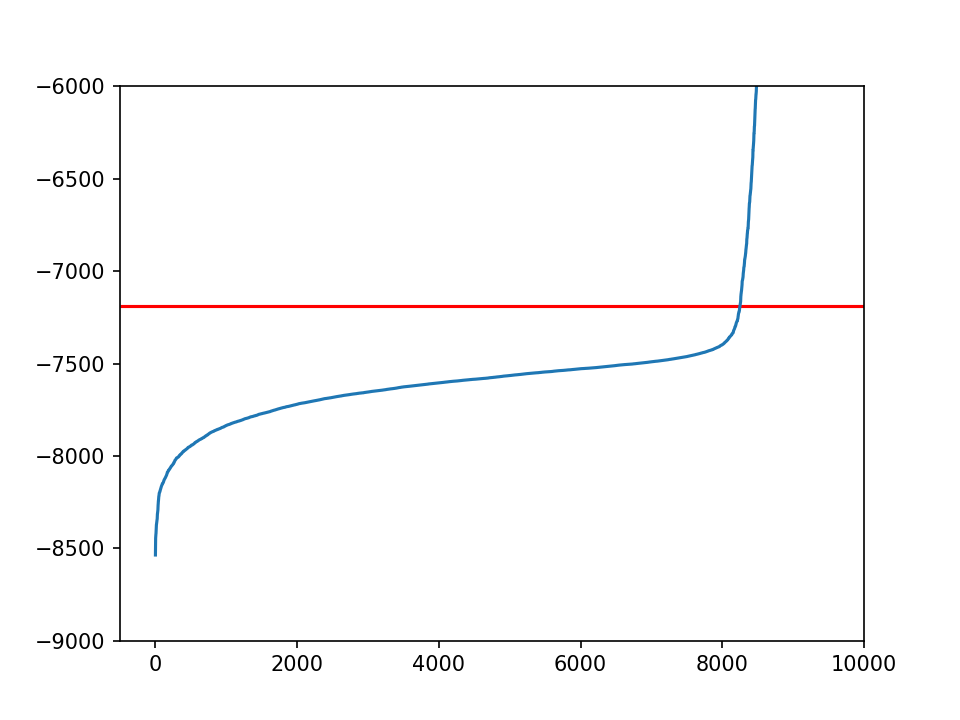

(-500, 10000)

In [35]:
plt.plot(range(len(potential_energy)),np.sort([ii._value for ii in potential_energy]))
plt.hlines(MM_Complex.get_potential_energy_uncoupled_complex()._value,-500,10000,'r')
plt.ylim(-9000,-6000)
plt.xlim(-500,10000)

In [47]:
index_best_conformation = np.argmin(potential_energy)

best_center = Region.centers[conformation[index_best_conformation][0]] 
best_rotation = Region.rotations[conformation[index_best_conformation][1]]

print('Energía Potencial de la mejor conformación evaluada', potential_energy[index_best_conformation])


MM_Complex.make_conformation(center=best_center, rotation=best_rotation)

view = MM_Complex.get_view()
view

Energía Potencial de la mejor conformación evaluada -8535.685546875 kJ/mol


NGLWidget()

In [50]:
Cristal_Complex = pnt.MolComplex(Receptor_pdb_file, Ligand_pdb_file,'amber14-all.xml',pH=7.0)

In [51]:
Cristal_Complex.get_view()

NGLWidget()